In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [3]:
# RUN THIS CELL

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [ ]:
berlin_wkdy = pd.read_csv("data/berlin_weekdays.csv")
list(berlin_wkdy.columns)

In [5]:
berlin_wknd = pd.read_csv("data/berlin_weekends.csv")
#list(berlin_wknd.columns)

In [74]:
#merging all the dataframes from kaggle into one large data frame 
countries = ['data/amsterdam', 'data/athens', 'data/barcelona', 'data/berlin', 
             'data/budapest', 'data/lisbon',  'data/london', 'data/paris', 'data/rome', 'data/vienna']

types = ['_weekdays.csv', '_weekends.csv']

country_dfs = []

for i in range(0, len(countries)):
    modified_dfs = []
    for j in range(0, 2):
        str = countries[i] + types[j]
        df = pd.read_csv(str)

        if types[j] == '_weekdays.csv':
            df["weekend"] = 0 
        else: 
            df["weekend"] = 1 

        modified_dfs.append(df)
        
    country_full_df = pd.concat(modified_dfs)
    country_full_df['country'] = countries[i][5:]
    country_dfs.append(country_full_df)

all_countries_df = pd.concat(country_dfs)

In [77]:
#scaling the numeric values in the dataframe 
numeric_preds = ['person_capacity', 'cleanliness_rating', 
                 'guest_satisfaction_overall', 'bedrooms', 
                'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 
                 'rest_index','rest_index_norm']

booleans_pred = ['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private', 'host_is_superhost', 
                'multi', 'biz', 'weekend','country', 'lng', 'lat']
#subset for all categorial variables 
numeric_df = all_countries_df[numeric_preds]
scaler = StandardScaler()
scaled_numeric_df = scaler.fit_transform(numeric_df)
scaled_numeric_df = pd.DataFrame(scaled_numeric_df, columns=numeric_preds)
boolean_df = all_countries_df[booleans_pred]
scaled_numeric_df.reset_index(drop=True, inplace=True)
boolean_df.reset_index(drop=True, inplace=True)
scaled_all_countries = pd.concat([scaled_numeric_df, boolean_df], axis=1)
scaled_all_countries.shape

(51707, 22)

In [80]:
#turning categorial variables into multiple indicator variables

all_countries_df['room_type'].unique()
dummies = pd.get_dummies(all_countries_df.room_type)
 
merged = pd.concat([all_countries_df, dummies], axis='columns')

all_countries_df_final = merged.drop(['room_type'], axis='columns')
all_countries_df_final.shape

(51707, 24)

In [81]:
#calculating covariance 
col_names = ['Unnamed: 0', 'realSum', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'weekend', 'country',
       'Entire home/apt', 'Private room', 'Shared room']
all_countries_df_final['Unnamed: 0']
#cov_matrix = all_countries_df_final.cov()

0          0
1          1
2          2
3          3
4          4
        ... 
1794    1794
1795    1795
1796    1796
1797    1797
1798    1798
Name: Unnamed: 0, Length: 51707, dtype: int64

In [ ]:
#applying PCA to the data to visualize data 

country, X = all_countries_df_final['country'], all_countries_df_final.drop(columns='country').values
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

pca = PCA(n_components = 2)

# Apply the PCA transformation 
X_transformed = pca.fit_transform(x_std)

# Get the explained variance ratios from the PCA
pca_scores = pca.explained_variance_ratio_

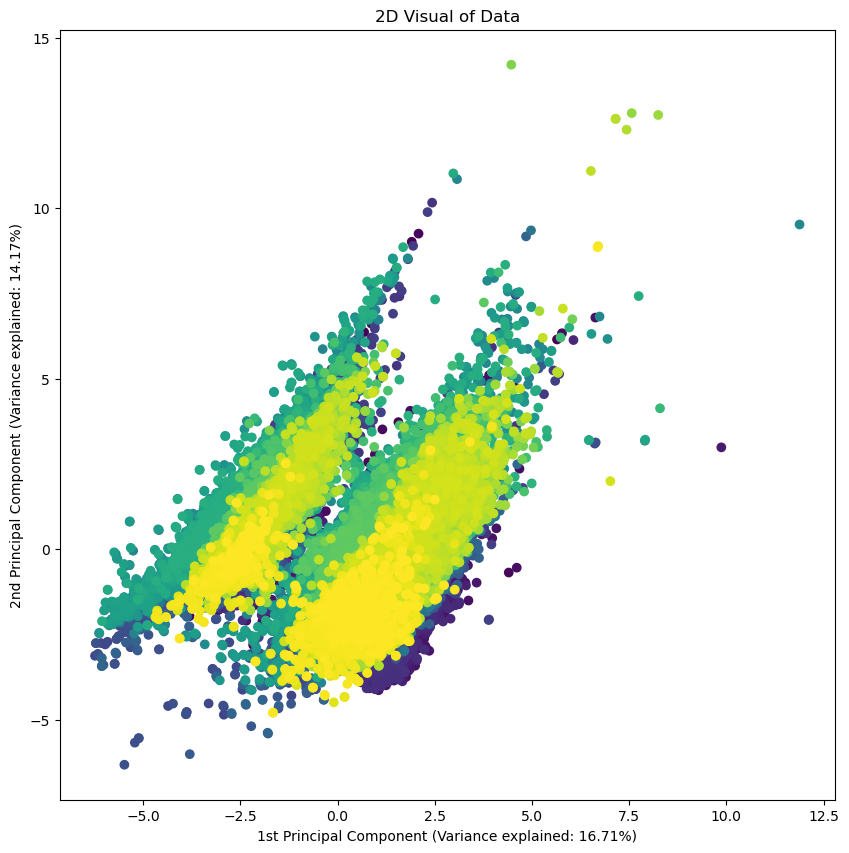

In [95]:
# Create a scatter plot
plt.figure(figsize=(10, 10))

unique_colors = np.arange(len(country))

scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=unique_colors, cmap='viridis')

# Label each point with the country name
#for i, country_name in enumerate(country):
#    plt.annotate(country_name, (X_transformed[i, 0], X_transformed[i, 1]))

# Set labels for the axes including variance explained
plt.xlabel(f'1st Principal Component (Variance explained: {pca_scores[0]*100:.2f}%)')
plt.ylabel(f'2nd Principal Component (Variance explained: {pca_scores[1]*100:.2f}%)')
plt.title('2D Visual of Data')

plt.show()